# Exploratory Data Analysis (EDA)


In [1]:
# importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading the final integrated dataset
eda_df = pd.read_csv('../../Data/preprocessed-data/final_cost_pph_seifa_dataset.csv')


In [4]:
print(eda_df.shape)
eda_df.head()

(30, 7)


,PHN_Code,PHN_Name,State,PPH_rate_per_100k,Cost_per_person,SEIFA_IRSD_Score,IRSD_Decile_Mean
0,PHN101,Central and Eastern Sydney,NSW,1688.577,111.426,1033.035,6.871
1,PHN102,Northern Sydney,NSW,1795.760,111.426,1085.809,9.188
2,PHN103,Western Sydney,NSW,1616.840,111.426,997.145,5.857
3,PHN104,Nepean Blue Mountains,NSW,1695.080,111.426,1005.928,5.719
4,PHN105,South Western Sydney,NSW,1639.889,111.426,931.202,4.225


In [6]:
# Checking the statistics
eda_df[['PPH_rate_per_100k','Cost_per_person','SEIFA_IRSD_Score', 'IRSD_Decile_Mean']].describe()

,PPH_rate_per_100k,Cost_per_person,SEIFA_IRSD_Score,IRSD_Decile_Mean
count,30.000000,30.000000,30.000000,30.000000
mean,2049.114167,120.675400,994.258700,5.279067
std,526.648665,10.309658,36.942266,1.542697
min,1616.840000,111.426000,921.922000,3.324000
25%,1729.606000,111.426000,971.302500,3.926750
50%,1890.711500,120.072000,992.012500,5.303500
75%,2183.709000,124.859000,1016.204750,6.077500
max,4152.960000,158.075000,1085.809000,9.188000


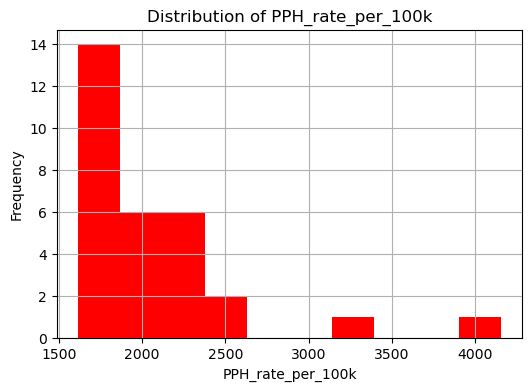

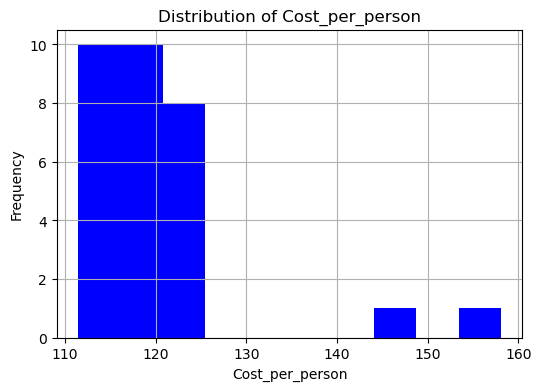

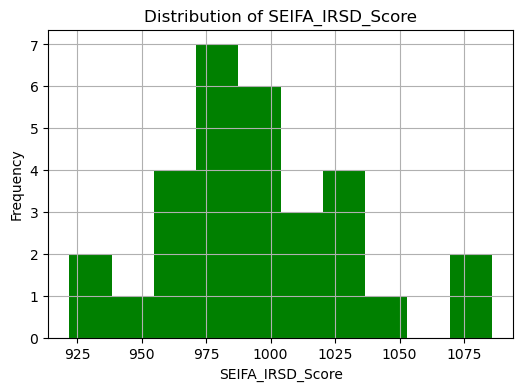

In [ ]:
# Plotting histograms to check about dirstribution

features = ['PPH_rate_per_100k','Cost_per_person','SEIFA_IRSD_Score']
colors = {
    'PPH_rate_per_100k': 'red',
    'Cost_per_person': 'blue',
    'SEIFA_IRSD_Score': 'green'
}

for col in features:
    plt.figure(figsize=(6,4))
    eda_df[col].hist(bins=10, color = colors[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

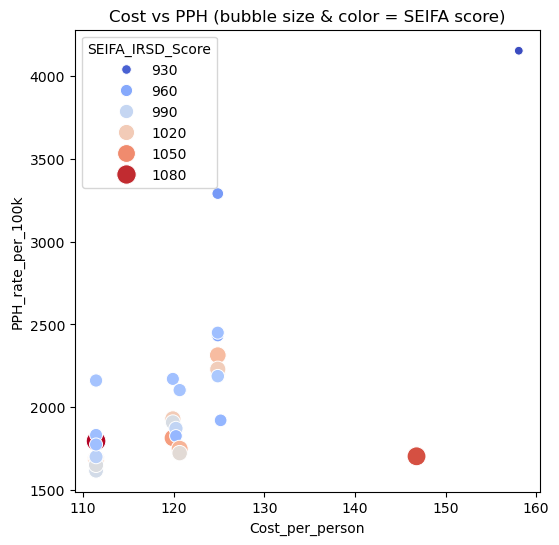

In [18]:
# Plotting Scatter Plots for Relationships

plt.figure(figsize=(6,6))
sns.scatterplot(
    data=eda_df,
    x='Cost_per_person', 
    y='PPH_rate_per_100k',
    size='SEIFA_IRSD_Score', 
    hue='SEIFA_IRSD_Score',
    palette='coolwarm', 
    sizes=(40,200)    )
plt.title("Cost vs PPH (bubble size & color = SEIFA score)")
plt.show()

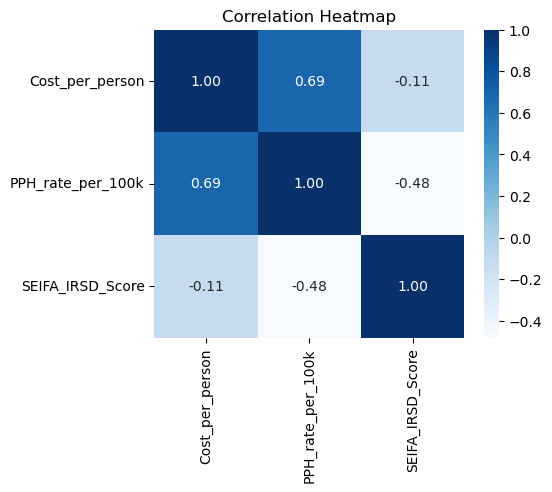

In [20]:
# Correlation Heatmap


corr = eda_df[['Cost_per_person','PPH_rate_per_100k','SEIFA_IRSD_Score']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


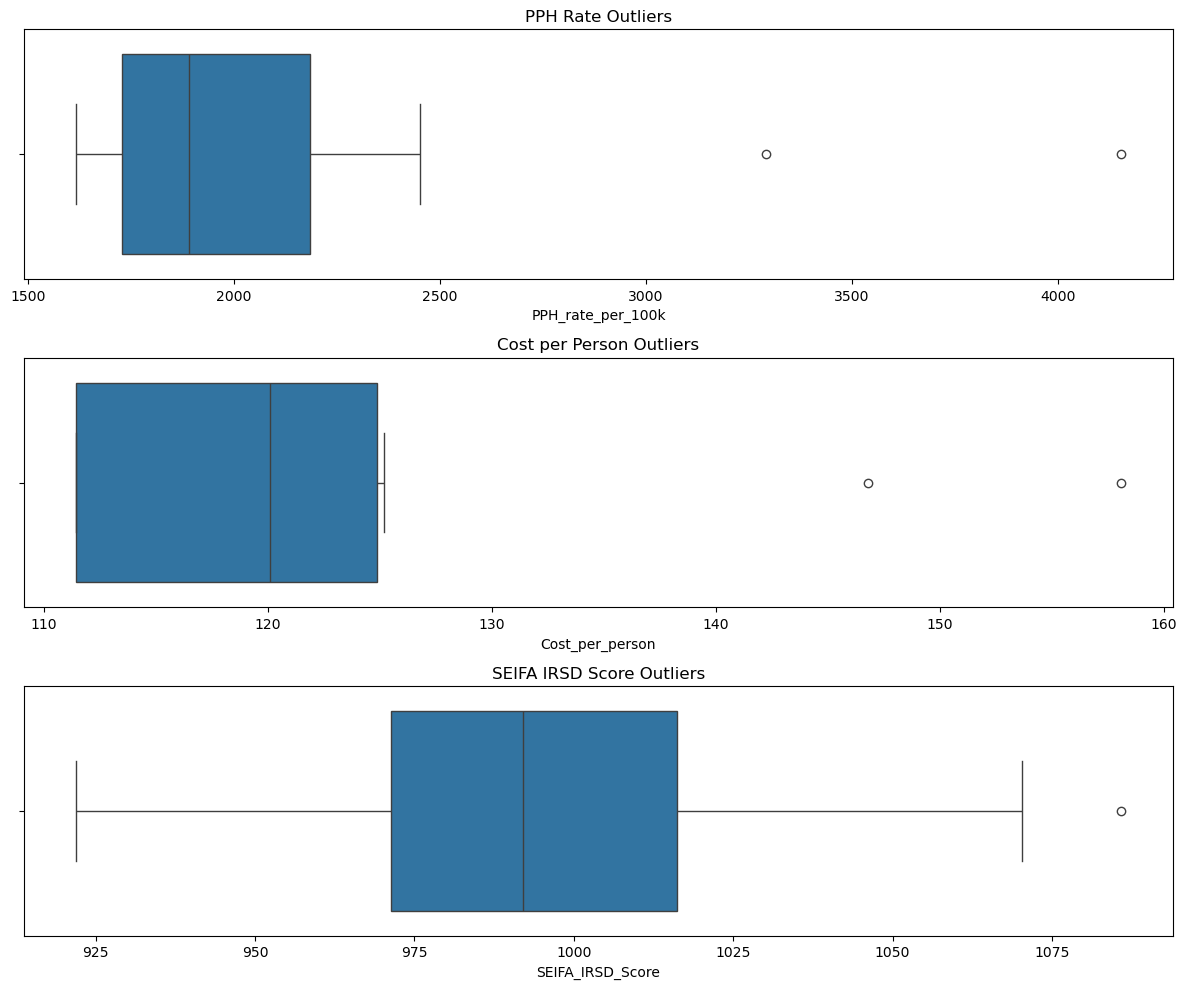

In [29]:
# Boxplot for outlier detection

fig, axes = plt.subplots(3,1,figsize=(12, 10))

sns.boxplot(x=eda_df['PPH_rate_per_100k'], ax=axes[0])
axes[0].set_title("PPH Rate Outliers")

sns.boxplot(x=eda_df['Cost_per_person'], ax=axes[1])
axes[1].set_title("Cost per Person Outliers")

sns.boxplot(x=eda_df['SEIFA_IRSD_Score'], ax=axes[2])
axes[2].set_title("SEIFA IRSD Score Outliers")



plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA) Summary

### 1. Descriptive Statistics  (Source: descriptive statistics table (`.describe()`))
- **Cost per person** ranged between **111–158** (mean ≈ 121).  
- **PPH rate per 100k** showed a much wider spread, **1616–4153** (mean ≈ 2050).  
- **SEIFA IRSD scores** were tighter, **922–1086** (mean ≈ 994).  

---

### 2. Distributions  (Source: histograms)
- **Cost per person**: tightly clustered around 110–125, with a few higher values (~150 and 158).  
- **PPH rate per 100k**: most PHNs fall between 1600–2500, but two extreme outliers (>3000 and >4000) exist.  
- **SEIFA IRSD scores**: approximately normal distribution around 1000, with mild tails at both ends.  

---

### 3. Relationships  (Source: bubble scatterplot and correlation heatmap)
- **Cost vs PPH**: moderate **positive correlation (r ≈ 0.69)**. Some regions with higher cost also have higher PPH.  
- **SEIFA vs PPH**: **negative correlation (r ≈ -0.48)**. More disadvantaged PHNs (lower SEIFA) tend to have higher hospitalization rates.  
- **SEIFA vs Cost**: near-zero correlation (r ≈ -0.11). Spending is not strongly aligned with socio-economic disadvantage.  

---

### 4. Outliers  (Source: boxplots)
- **PPH rate per 100k**: two strong outliers (>3000, >4000).  
- **Cost per person**: two outliers (~150, ~158).  
- **SEIFA IRSD scores**: mostly stable, one higher score (~1086) appears.  


## Scaling Data for Clustering

The three features selected for clustering are:
    - Cost-per_person
    - PPH_rate_per_100k
    - SEIFA_IRSD_Score

These variables are on different scales:
- Cost ≈ 100–150
- PPH ≈ 1600–4000
- SEIFA ≈ 900–1100

If left unscaled, the clustering algorithm would be dominated by the variable with the largest range (PPH).  

In [ ]:
# Importing the required libraries
from sklearn.preprocessing import StandardScaler

# Pandas has already imported

In [34]:
# Selecting the features to be used in clustering
clustering_features = eda_df[['Cost_per_person','PPH_rate_per_100k','SEIFA_IRSD_Score']]

# Initalising the scaler
standard_scaler = StandardScaler()

# Fit and transform the clustering features
scaled_clustering_features = standard_scaler.fit_transform(clustering_features)

# Creating a dataframe with the scaled values
scaled_clustering_df = pd.DataFrame(
    scaled_clustering_features,
    columns = ['Cost_per_person_scaled','PPH_rate_per_100k_scaled','SEIFA_IRSD_Score_scaled'],
    index = eda_df.index
)

# Adding the other non -scaled columns to the dataframe
final_scaled_df = pd.concat([eda_df[['PHN_Code','PHN_Name','State']], scaled_clustering_df], axis=1)

final_scaled_df.head()


,PHN_Code,PHN_Name,State,Cost_per_person_scaled,PPH_rate_per_100k_scaled,SEIFA_IRSD_Score_scaled
0,PHN101,Central and Eastern Sydney,NSW,-0.912496,-0.696291,1.067590
1,PHN102,Northern Sydney,NSW,-0.912496,-0.489293,2.520565
2,PHN103,Western Sydney,NSW,-0.912496,-0.834834,0.079466
3,PHN104,Nepean Blue Mountains,NSW,-0.912496,-0.683732,0.321279
4,PHN105,South Western Sydney,NSW,-0.912496,-0.790320,-1.736078


In [ ]:
# Saving the final scaled dataframe into a csv file for clustering
final_scaled_df.to_csv("../../Data/preprocessed-data/final_scaled_dataset.csv", index=False)